In [24]:
import bokeh.io
import bokeh.plotting
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.layouts import gridplot
from bokeh.plotting import figure
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from bokeh.models import ColumnDataSource, Whisker

from natsort import natsorted, ns

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
MiceToAnalyze = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199','GF200','GF201','GF207']
ArtiFactMice = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199']

In [3]:
#Read the 2P pickle file for every mouse to analyse

serverPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\'

dataDays = np.zeros([len(MiceToAnalyze),6,211,6])

for i, mouse in enumerate(MiceToAnalyze):
    
    print('Reading 2P file for the mouse : ' + mouse + '...')
    
    dataPath = serverPath + mouse + "\\2P\\" + mouse + '_2P.p' 
    
    with open(dataPath, 'rb') as fp:
        data = pickle.load(fp)
      
    print('Calculating mean for mouse: ' + mouse)
    
    for d in range(6):
        
        dataDays[i,d,:,0] = np.mean(data[d]['WM']['WMDFF'],axis = (0,2))
        dataDays[i,d,:,1] = np.mean(data[d]['AM']['AMDFF'],axis = (0,2))
        dataDays[i,d,:,2] = np.mean(data[d]['WH']['WHDFF'],axis = (0,2))
        dataDays[i,d,:,3] = np.mean(data[d]['AH']['AHDFF'],axis = (0,2))
        dataDays[i,d,:,4] = np.mean(data[d]['CR']['CRDFF'],axis = (0,2))
        dataDays[i,d,:,5] = np.mean(data[d]['FA']['FADFF'],axis = (0,2))
        
        if mouse in ArtiFactMice:
            
            print('Mouse with artifact, correcting using CR..')
            
            dataDays[i,d,:,0] = dataDays[i,d,:,0] - dataDays[i,d,:,4]
            dataDays[i,d,:,1] = dataDays[i,d,:,1] - dataDays[i,d,:,4]
            dataDays[i,d,:,2] = dataDays[i,d,:,2] - dataDays[i,d,:,4]
            dataDays[i,d,:,3] = dataDays[i,d,:,3] - dataDays[i,d,:,4]
            dataDays[i,d,:,5] = dataDays[i,d,:,5] - dataDays[i,d,:,4]
        
        

   
    

Reading 2P file for the mouse : GF173...
Calculating mean for mouse: GF173
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF174...


C:\Users\foustouk\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\foustouk\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Calculating mean for mouse: GF174
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF175...
Calculating mean for mouse: GF175
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF181...
Calculating mean for mouse: GF181
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF187...
C

In [12]:
mouse = 'GF173'

In [13]:
mouse in ArtiFactMice


True

In [4]:
dataDays.shape

(10, 6, 211, 6)

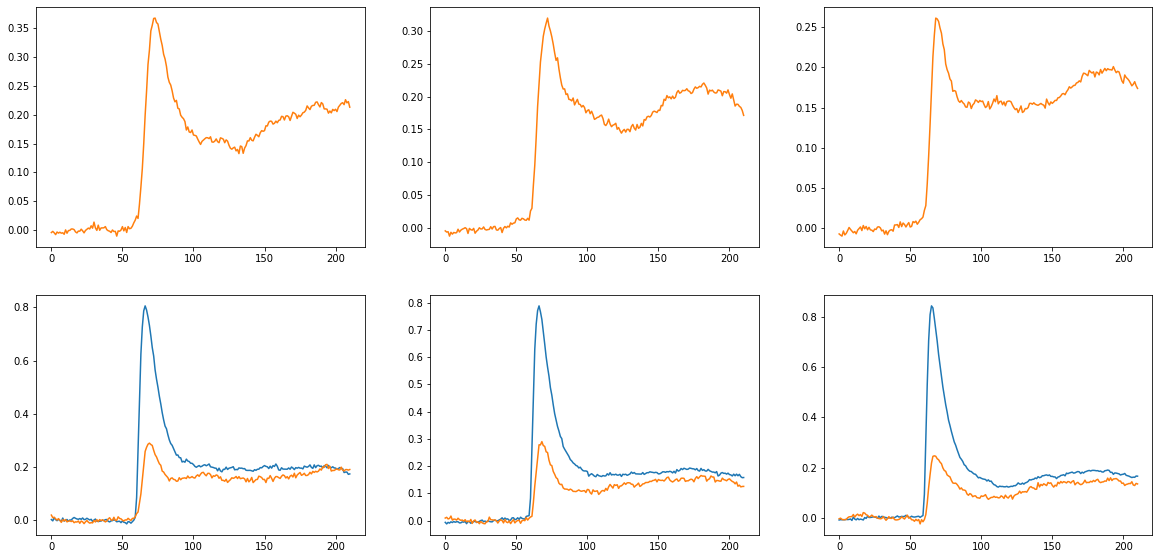

In [10]:
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.plot(np.mean(dataDays[:,i,:,2],axis = 0))
    plt.plot(np.mean(dataDays[:,i,:,3],axis = 0))
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

In [23]:
time = np.array(range(0,211))/30
for i in range(6):
    p = bokeh.plotting.figure(
        width=700,
        height=400,
        x_axis_label='Time (s)',
        y_axis_label='DF/F z-scored',
        title= 'Day: ' + str(i+1)  + ' (n = ' + str(dataDays.shape[0])  + ')'
        )
    if i == 3:
        
        p = bokeh.plotting.figure(
        width=700,
        height=400,
        x_axis_label='Time (s)',
        y_axis_label='DF/F z-scored',
        title= 'Day: ' + str(i+1) + ', SWD' + ' (n = ' + str(dataDays.shape[0]) + ')'
        )
        
    p.line(
    x= time,
    y= np.mean(dataDays[:,i,:,2],axis = 0),
    line_join='bevel',
    line_width=2,
    color = 'black',
    )
    
    p.yaxis.axis_label_text_font_style = "bold"
    p.xaxis.axis_label_text_font_style = "bold"
    p.title.align = 'center'
    
    bokeh.io.show(p) 





In [13]:
time = np.array(range(0,211))/30

In [15]:
time

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
       1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
       1.5       , 1.53333333, 1.56666667, 1.6       , 1.63333333,
       1.66666667, 1.7       , 1.73333333, 1.76666667, 1.8       ,
       1.83333333, 1.86666667, 1.9       , 1.93333333, 1.96666667,
       2.        , 2.03333333, 2.06666667, 2.1       , 2.13333333,
       2.16666667, 2.2       , 2.23333333, 2.26666667, 2.3       ,
       2.33333333, 2.36666667, 2.4       , 2.43333333, 2.46666

In [6]:
errorAudH = np.nanstd(dataAll[:,:,0],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,0])),axis = 0))
errorWhH = np.nanstd(dataAll[:,:,1],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,1])),axis = 0))
errorFA = np.nanstd(dataAll[:,:,2],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,2])),axis = 0))


MeanAudH = np.nanmean(dataAll[:,:,0],axis=0)
MeanWhH = np.nanmean(dataAll[:,:,1],axis=0)
MeanFA = np.nanmean(dataAll[:,:,2],axis=0)

Days = dataAll.shape[1] + 1

p = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='AudHit/WhHit/FA',
    title= 'Mean Behaviour (n=15)' 
    )

p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'


audh = p.line(
x= range(1,Days,1),
y= MeanAudH ,
line_join='bevel',
line_width=2,
color = 'blue',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanAudH, errorAudH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='blue')



err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanWhH, errorWhH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='black')


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanFA, errorFA ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='red')


p.circle(range(1,Days,1), MeanAudH , color='blue', size=5, line_alpha=0)

fa = p.line(
x= range(1,Days,1),
y= MeanFA,
line_join='bevel',
line_width=2,
color = 'red',
)

p.circle(range(1,Days,1), MeanFA , color='red', size=5, line_alpha=0)

whhit = p.line(
x= range(1,Days,1),
y= MeanWhH,
line_join='bevel',
line_width=2,
color = 'black',
)

p.circle(range(1,Days,1), MeanWhH , color='black', size=5, line_alpha=0)

legend = Legend(items=[
("AudHit" , [audh]),
("WhHit" , [whhit]),
("FA" , [fa])   
], location="center")

p.add_layout(legend, 'right')

p.legend.click_policy="hide"

bokeh.io.show(p) 

errorDprime = np.nanstd(dataAll[:,:,3],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,3])),axis = 0))
MeanDprime = np.nanmean(dataAll[:,:,3],axis=0)

k = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='dprime for W',
    title= 'Mean dprime (n=15)' 
    )

k.yaxis.axis_label_text_font_style = "bold"
k.xaxis.axis_label_text_font_style = "bold"
k.title.align = 'center'

dprime = k.line(
x= range(1,Days,1),
y= MeanDprime ,
line_join='bevel',
line_width=2,
color = 'green',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanDprime, errorDprime):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
k.multi_line(err_xs, err_ys, color='green')
bokeh.io.show(k) 
